In [55]:
!pip install skimpy

# About Dataset

This Amazon Delivery Dataset provides a comprehensive view of the company's last-mile logistics operations. It includes data on over 43,632 deliveries across multiple cities, with detailed information on order details, delivery agents, weather and traffic conditions, and delivery performance metrics. The dataset enables researchers and analysts to uncover insights into factors influencing delivery efficiency, identify areas for optimization, and explore the impact of various variables on the overall customer experience.

## Dataset Features

- **Order_ID**
  - Unique identifier for each order
  
- **Agent_Age**
  - Age of the delivery agent
  
- **Agent_Rating**
  - Rating or performance score of the delivery agent
  
- **Store_Latitude**
  - Geographic coordinates of the store where the order was placed
  
- **Store_Longitude**
  - Geographic coordinates of the store where the order was placed
  
- **Drop_Latitude**
  - Geographic coordinates of the delivery location
  
- **Drop_Longitude**
  - Geographic coordinates of the delivery location
  
- **Order_Date**
  - Date when the order was placed
  
- **Order_Time**
  - Time when the order was placed
  
- **Pickup_Time**
  - Time when the order was picked up for delivery


# IMPORT LIBRARIES

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
pd.set_option('display.max_columns', 100)
import warnings


warnings.filterwarnings("ignore")

# DATA UNDERSTANDING

In [57]:
df = pd.read_csv("/kaggle/input/amazon-delivery-dataset/amazon_delivery.csv")
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [58]:
df.shape

(43739, 16)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [60]:
df.duplicated().sum().any()

False

In [61]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [62]:
# removing columns with NaN values helps ensure data integrity,
# simplifies analysis, focuses on relevant information, improves efficiency,
# and enhances interpretability in data-driven tasks.

df = df.dropna()

In [63]:
df.isna().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [64]:
df.shape

(43594, 16)

In [65]:
df.dtypes.value_counts()

object     9
float64    5
int64      2
Name: count, dtype: int64

# Overall
1. Dataset have no null values
2. Dataset have object : 9, float64 : 5, int64 : 2
3. Dataset have no duplucates


# DESCRIPTIVE STATISTICS

In [66]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 43594  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean   ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Agent_Age          │   0 │     0 │  29.56 │    5.761 │     20 │     25 │     30 │     35 │     39 │ ▇▆▆▆▆▇ │  │
│ │ Agent_Rating       │   0 │     0 │  4.635 │   0.3138 │    2.5 │    4.5 │    4.7 │    4.9 │      5 │    ▁▂▇ │  │
│ │ Store_Latitude     │   0 │     0 │  17.24 │     7.69 │  -30.9 │  12.93 │  18.55 │  22.73 │  30.91 │   ▁ ▇▆ │  │
│ │ Store_Longitude    │   0 │     0 │  70.77 │    21.13 │      0 │  73.17 │   75.9 │  78.05 │  88.43 │ ▁   ▂▇ │  │
│ │ Drop_Latitude      │   0 │     0 │  17.46 │    7.338 │   0.01 │  12.99 │  18.63 │  22.79 │  31.05 │ ▂ ▇▇▇▃ │  │
│ │ Drop_Longitude     │   0 │     0 │  70.83 │    21.13 │   0.01 │  73.28 │     76 │   78.1 │  88.56 │ ▁   ▂▇ │  │
│ │ Delivery_Time      │   0 │     0 │  124.9 │    51.94 │     10 │     90 │    125 │    160 │    270 │ ▂▇▇▆▃▁ │  │
│ └────────────────────┴─────┴───────┴────────┴──────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Order_ID                  │       0 │          0 │                            1 │                    43594 │  │
│ │ Order_Date                │       0 │          0 │                            1 │                    43594 │  │
│ │ Order_Time                │       0 │          0 │                            1 │                    43594 │  │
│ │ Pickup_Time               │       0 │          0 │                            1 │                    43594 │  │
│ │ Weather                   │       0 │          0 │                            1 │                    43594 │  │
│ │ Traffic                   │       0 │          0 │                            2 │                    87188 │  │
│ │ Vehicle                   │       0 │          0 │                          1.9 │                    83670 │  │
│ │ Area                      │       0 │          0 │                            2 │                    86053 │  │
│ │ Category                  │       0 │          0 │                          1.1 │                    46273 │  │
│ └───────────────────────────┴─────────┴────────────┴──

## Dataset Summary

The dataset contains the following columns with their respective statistics:

- **Order_ID**
  - **NA:** 0
  - **Mean:** N/A (unique identifiers)
  - **Standard Deviation:** N/A
  - **Distribution:** N/A (unique values)

- **Agent_Age**
  - **NA:** 0
  - **Mean:** 29.56
  - **Standard Deviation:** 5.761
  - **Distribution:** Normally distributed

- **Agent_Rating**
  - **NA:** 0
  - **Mean:** 4.635
  - **Standard Deviation:** 0.3138
  - **Distribution:** Normally distributed

- **Store_Latitude**
  - **NA:** 0
  - **Mean:** 17.24
  - **Standard Deviation:** 7.69
  - **Distribution:** Normally distributed with an outlier at -30.9

- **Store_Longitude**
  - **NA:** 0
  - **Mean:** 70.77
  - **Standard Deviation:** 21.13
  - **Distribution:** Normally distributed

- **Drop_Latitude**
  - **NA:** 0
  - **Mean:** 17.46
  - **Standard Deviation:** 7.338
  - **Distribution:** Normally distributed

- **Drop_Longitude**
  - **NA:** 0
  - **Mean:** 70.83
  - **Standard Deviation:** 21.13
  - **Distribution:** Normally distributed

- **Order_Date**
  - **NA:** 0
  - **Mean:** N/A (date format)
  - **Standard Deviation:** N/A
  - **Distribution:** N/A (date values)

- **Order_Time**
  - **NA:** 0
  - **Mean:** N/A (time format)
  - **Standard Deviation:** N/A
  - **Distribution:** N/A (time values)

- **Pickup_Time**
  - **NA:** 1 (dropped due to missing value handling)
  - **Mean:** N/A (time format)
  - **Standard Deviation:** N/A
  - **Distribution:** N/A (time values)

- **Weather**
  - **NA:** 0
  - **Categories:** Sunny, Stormy, Sandstorms, Cloudy
  - **Distribution:** Categorical with varying frequencies

- **Traffic**
  - **NA:** 0
  - **Categories:** High, Jam, Low, Medium
  - **Distribution:** Categorical with varying frequencies

- **Vehicle**
  - **NA:** 0
  - **Categories:** motorcycle, scooter
  - **Distribution:** Categorical with varying frequencies

- **Area**
  - **NA:** 0
  - **Categories:** Urban, Metropolitian
  - **Distribution:** Categorical with varying frequencies

- **Delivery_Time**
  - **NA:** 0
  - **Mean:** 124.9
  - **Standard Deviation:** 51.94
  - **Distribution:** Normally distributed with outliers at higher values

- **Category**
  - **NA:** 0
  - **Categories:** Clothing, Electronics, Sports, Cosmetics, Toys
  - **Distribution:** Categorical with varying frequencies

### Anomalies

- **Store_Latitude:** The outlier at -30.9 suggests potential erroneous data or an unusual location entry.
- **Delivery_Time:** Outliers at higher values indicate extended delivery times that may require investigation for accuracy or anomalous cases.

Overall, the dataset shows no missing values after handling, and the distributions of numerical variables are generally normal. Categorical variables exhibit varying frequencies across different categories, providing insights into different aspects of the dataset.


# EDA

In [67]:
# Now we will change columns Order_Date and Pickup_Time in order to improve our EDA

# Convert Order_Date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract day of week and month
df['Order_Weekday'] = df['Order_Date'].dt.day_name()
df['Order_Month'] = df['Order_Date'].dt.month_name()

# Convert Pickup_Time to datetime formate
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S').dt.time

In [68]:
# Function for categorizing time of day
def categorize_time(time):
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

In [69]:
df['Pickup_Time_Category'] = df['Pickup_Time'].apply(categorize_time)

In [70]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Order_Weekday,Order_Month,Pickup_Time_Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,Saturday,March,Morning
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,Friday,March,Evening
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,Saturday,March,Morning
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,Tuesday,April,Evening
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,Saturday,March,Afternoon


In [71]:
df.Order_Weekday.value_counts()

Order_Weekday
Wednesday    6775
Friday       6727
Thursday     6081
Tuesday      6065
Saturday     6028
Sunday       5980
Monday       5938
Name: count, dtype: int64

In [72]:
df.Order_Month.value_counts()

Order_Month
March       30588
February     6916
April        6090
Name: count, dtype: int64

In [73]:
# column "Order_Month "not needed as it doesn’t have
# all the months of the year
df.Order_Month.value_counts()

Order_Month
March       30588
February     6916
April        6090
Name: count, dtype: int64

In [74]:
# Collect only importnant columns
df_new = df.drop(columns = ['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Month'])
df_new

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Order_Weekday,Pickup_Time_Category
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,motorcycle,Urban,120,Clothing,Saturday,Morning
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,scooter,Metropolitian,165,Electronics,Friday,Evening
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,motorcycle,Urban,130,Sports,Saturday,Morning
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,Tuesday,Evening
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,scooter,Metropolitian,150,Toys,Saturday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,30,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,motorcycle,Metropolitian,160,Home,Thursday,Morning
43735,21,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,Wednesday,Evening
43736,30,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,scooter,Metropolitian,80,Home,Friday,Night
43737,20,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,Monday,Afternoon


In [75]:
df_new.dtypes

Agent_Age                 int64
Agent_Rating            float64
Store_Latitude          float64
Store_Longitude         float64
Drop_Latitude           float64
Drop_Longitude          float64
Weather                  object
Traffic                  object
Vehicle                  object
Area                     object
Delivery_Time             int64
Category                 object
Order_Weekday            object
Pickup_Time_Category     object
dtype: object

In [76]:
num_cols = df_new.select_dtypes(include = ["int64", "float64"])
cat_cols = df_new.select_dtypes(include = ["object"])

In [84]:
# Calculate skewness for each column in the DataFrame
numeric_cols = df_new.select_dtypes(include=['float64', 'int64'])
skew_after = numeric_cols.skew()

# Print skewness for each column
for col, skew in skew_after.items():
    print(f'Skewness of {col}: {skew:.2f}')

Skewness of Agent_Age: -0.01
Skewness of Agent_Rating: -1.79
Skewness of Store_Latitude: -1.06
Skewness of Store_Longitude: -2.95
Skewness of Drop_Latitude: -0.70
Skewness of Drop_Longitude: -2.95
Skewness of Delivery_Time: 0.19


# CORREALTION

In [93]:
num_cols = df_new.select_dtypes(include = ["int64", "float64"])
num_corr = num_cols.corr()['Delivery_Time'][:-1] # -1 means that the latest row is SalePrice
top_features = num_corr #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 6 strongly correlated values with SalePrice:
Agent_Age          0.258463
Agent_Rating      -0.307725
Store_Latitude     0.016890
Store_Longitude    0.011805
Drop_Latitude      0.017279
Drop_Longitude     0.012287
Name: Delivery_Time, dtype: float64


# PREPROCESSING

## Splitting Data 

In [103]:
X = df_new.drop(columns = ['Delivery_Time'], axis = 1)
y = df_new['Delivery_Time']

## Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Print the transformed DataFrame
print(X.head())

   Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
0         37           4.9       22.745049        75.892471      22.765049   
1         34           4.5       12.913041        77.683237      13.043041   
2         23           4.4       12.914264        77.678400      12.924264   
3         38           4.7       11.003669        76.976494      11.053669   
4         32           4.6       12.972793        80.249982      13.012793   

   Drop_Longitude  Weather  Traffic  Vehicle  Area  Category  Order_Weekday  \
0       75.912471        4        0        0     3         2              2   
1       77.813237        3        1        1     0         4              0   
2       77.688400        2        2        0     3        14              2   
3       77.026494        4        3        0     0         3              5   
4       80.289982        0        0        1     0        15              2   

   Pickup_Time_Category  
0                     2  
1   

## Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to each numeric column
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Print the transformed DataFrame
print(X.head())

   Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  \
0   1.292270      0.843511        0.715259         0.242495       0.722735   
1   0.771493     -0.431093       -0.563300         0.327251      -0.602130   
2  -1.138023     -0.749744       -0.563141         0.327022      -0.618316   
3   1.465863      0.206209       -0.811595         0.293802      -0.873231   
4   0.424309     -0.112442       -0.555529         0.448734      -0.606252   

   Drop_Longitude   Weather   Traffic   Vehicle      Area  Category  \
0        0.240430  0.888229 -1.846160 -0.773439  1.844093 -1.191028   
1        0.330392  0.301931 -0.780236  0.785671 -0.562883 -0.758088   
2        0.324483 -0.284367  0.285687 -0.773439  1.844093  1.406614   
3        0.293156  0.888229  1.351611 -0.773439 -0.562883 -0.974558   
4        0.447614 -1.456962 -1.846160  0.785671 -0.562883  1.623084   

   Order_Weekday  Pickup_Time_Category  
0      -0.494976              0.238226  
1      -1.474792      

# Modeling

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34875, 13)
(8719, 13)
(34875,)
(8719,)


# 1-Model: XGBoost

In [129]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model_xgb = XGBRegressor(
    max_depth=7,
    learning_rate=0.01,
    n_estimators=1500)



model_xgb.fit(X_train, y_train)


y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)


train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train score R2: ", train_r2)
print("Train MSE: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("Test score R2: ", test_r2)
print("Test MSE: ", mean_squared_error(y_test, y_pred_test, squared=False))

Train score R2:  0.8295540652165106
Train MSE:  21.51038152459222
Test score R2:  0.7710660863139076
Test MSE:  24.5368134594824


# Model-2: Gradient Boosting Machine

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(n_estimators=1500,
                                     learning_rate=0.01,
                                     max_depth=7,
                                     subsample=0.8,
                                     random_state=42) 


model_gb.fit(X_train, y_train)


ygb_pred_train = model_gb.predict(X_train)
ygb_pred_test = model_gb.predict(X_test)

train_r2 = r2_score(y_train, ygb_pred_train)
train_rmse = mean_squared_error(y_train, ygb_pred_train, squared=False)
test_r2 = r2_score(y_test, ygb_pred_test)
test_rmse = mean_squared_error(y_test, ygb_pred_test, squared=False)

print("Train R2 score: ", train_r2)
print("Train RMSE: ", train_rmse)
print("Test R2 score: ", test_r2)
print("Test RMSE: ", test_rmse)

Train R2 score:  0.8446313913234341
Train RMSE:  20.53697280343787
Test R2 score:  0.7783465928446769
Test RMSE:  24.143504007307527


# Model-3: CatBoost

In [140]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(iterations=1500,
                              learning_rate=0.01,
                              depth=7,
                              random_seed=42,  
                              verbose=0)  


model_cat.fit(X_train, y_train)


ycat_pred_train = model_cat.predict(X_train)
ycat_pred_test = model_cat.predict(X_test)

train_r2 = r2_score(y_train, ycat_pred_train)
train_rmse = mean_squared_error(y_train, ycat_pred_train, squared=False)
test_r2 = r2_score(y_test, ycat_pred_test)
test_rmse = mean_squared_error(y_test, ycat_pred_test, squared=False)


print("Train R2 score: ", train_r2)
print("Train RMSE: ", train_rmse)
print("Test R2 score: ", test_r2)
print("Test RMSE: ", test_rmse)

Train R2 score:  0.7695540270633715
Train RMSE:  25.011477715297108
Test R2 score:  0.7555853530653798
Test RMSE:  25.352845445829747


# 4-Model: LGBM

In [141]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error


model_lgbm = LGBMRegressor(n_estimators=1500,
                           learning_rate=0.01,
                           max_depth=7,
                           subsample=0.8,
                           random_state=42)  


model_lgbm.fit(X_train, y_train)


ylgbm_pred_train = model_lgbm.predict(X_train)
ylgbm_pred_test = model_lgbm.predict(X_test)


train_r2 = r2_score(y_train, ylgbm_pred_train)
train_rmse = mean_squared_error(y_train, ylgbm_pred_train, squared=False)
test_r2 = r2_score(y_test, ylgbm_pred_test)
test_rmse = mean_squared_error(y_test, ylgbm_pred_test, squared=False)


print("Train R2 score (LightGBM): ", train_r2)
print("Train RMSE (LightGBM): ", train_rmse)
print("Test R2 score (LightGBM): ", test_r2)
print("Test RMSE (LightGBM): ", test_rmse)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 34875, number of used features: 13
[LightGBM] [Info] Start training from score 125.163642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

# 5-Model: AdaBoost

In [142]:
from sklearn.ensemble import AdaBoostRegressor



model_adaboost = AdaBoostRegressor(n_estimators=1500,
                                   learning_rate=0.01,
                                   random_state=42)  


model_adaboost.fit(X_train, y_train)


yadaboost_pred_train = model_adaboost.predict(X_train)
yadaboost_pred_test = model_adaboost.predict(X_test)


train_r2 = r2_score(y_train, yadaboost_pred_train)
train_rmse = mean_squared_error(y_train, yadaboost_pred_train, squared=False)
test_r2 = r2_score(y_test, yadaboost_pred_test)
test_rmse = mean_squared_error(y_test, yadaboost_pred_test, squared=False)


print("Train R2 score (AdaBoost): ", train_r2)
print("Train RMSE (AdaBoost): ", train_rmse)
print("Test R2 score (AdaBoost): ", test_r2)
print("Test RMSE (AdaBoost): ", test_rmse)


Train R2 score (AdaBoost):  0.44719920811035485
Train RMSE (AdaBoost):  38.73817153477022
Test R2 score (AdaBoost):  0.44097490056338107
Test RMSE (AdaBoost):  38.34235188764298


# Gradient Boosting Best Model/ Feature Importance

In [151]:
def get_feature_importances(regression_model, feature_names):
    importances = regression_model.feature_importances_
    importance_dict = {feature_names[i]: importances[i] for i in range(len(importances))}
    sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}
    return sorted_importances


importance_dict = get_feature_importances(model_gb, X_test.columns)

print("Feature importances:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

Feature importances:
Category: 0.30061919528895836
Agent_Rating: 0.18938189175449732
Traffic: 0.13268248299876542
Weather: 0.12986961160886074
Agent_Age: 0.07791846774089908
Pickup_Time_Category: 0.03586299007143122
Drop_Latitude: 0.02824023495200926
Vehicle: 0.027720228023029186
Drop_Longitude: 0.027700689414715967
Area: 0.014788949400413386
Store_Longitude: 0.014779118951018038
Store_Latitude: 0.011717821499279015
Order_Weekday: 0.008718318296123146


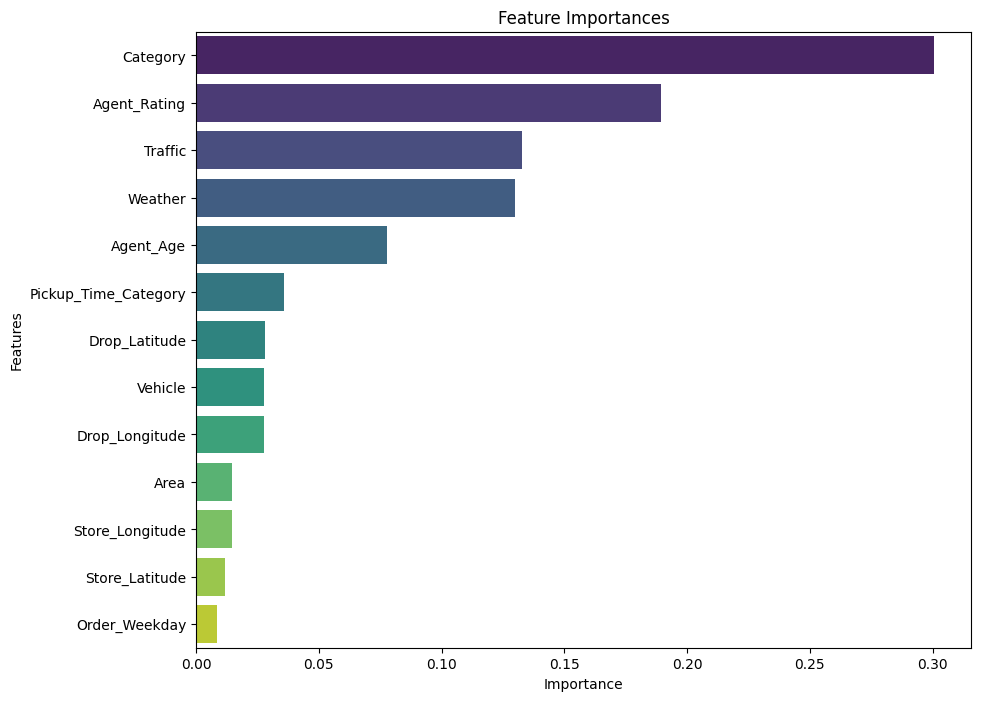

In [152]:
feature_names = list(importance_dict.keys())
importances = list(importance_dict.values())

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=feature_names, orient='h', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')

plt.show()